In [1]:
from controller import Imager
import time
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
import os

In [2]:
imager = Imager()

num_cams = len(imager.cams)

Found 5 devices
Devices IDs - ['101935', '101934', '101936', '101933', '192900073']


In [61]:
exposure=30000

imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['8']
imager.update_params(ExposureTime=exposure, PixelFormat=PIXELFORMAT)

In [4]:
imager._start_acquisitions()



In [67]:
time.sleep(10)
num_images = 5
break_sets = 0.1 #in seconds
break_images = 0 # if == 0: 3 images are taken with no break (for repetition),
                         # then then there is a break_sets.
                         # if break_sets == break_images,
                         # there is no repetition.

raw_images, metadata = imager.capture_sequence(num_images, break_sets,break_images)

0 - 2021-10-26 17:22:08.940479 - 101935 captured Mono8 image 
0 - 2021-10-26 17:22:08.961667 - 101934 captured Mono8 image 
0 - 2021-10-26 17:22:08.962757 - 101936 captured Mono8 image 
0 - 2021-10-26 17:22:08.963757 - 101933 captured Mono8 image 
0 - 2021-10-26 17:22:08.965757 - 192900073 captured Mono8 image 
1 - 2021-10-26 17:22:08.970507 - 101935 captured Mono8 image 
1 - 2021-10-26 17:22:08.990569 - 101934 captured Mono8 image 
1 - 2021-10-26 17:22:09.370280 - 101936 captured Mono8 image 
1 - 2021-10-26 17:22:09.408665 - 101933 captured Mono8 image 
1 - 2021-10-26 17:22:09.445687 - 192900073 captured Mono8 image 
2 - 2021-10-26 17:22:09.451674 - 101935 captured Mono8 image 
2 - 2021-10-26 17:22:09.452673 - 101934 captured Mono8 image 
2 - 2021-10-26 17:22:09.453674 - 101936 captured Mono8 image 
2 - 2021-10-26 17:22:09.816898 - 101933 captured Mono8 image 
2 - 2021-10-26 17:22:09.818897 - 192900073 captured Mono8 image 
3 - 2021-10-26 17:22:09.967353 - 101935 captured Mono8 image 

In [68]:
experiment= 'us'

if not os.path.exists(experiment):
    os.mkdir(experiment)

In [69]:
short = 'us'
sub = 1
repeat = 2
directory = f"./{experiment}/{short}{sub}{repeat}_{exposure}"
if not os.path.exists(directory):
    os.mkdir(directory)
for i, nagla in enumerate(raw_images):
    if not os.path.exists(f"./{directory}/{i}"):
        os.mkdir(f"./{directory}/{i}")
    for img, met in zip(nagla, metadata[i*num_cams:num_cams*(i+1)]):
        #np.save(f'./{directory}/{i}/{met[1].strftime("%d_%H_%M_%S_%f")}_{met[2]}', img)
        I = np.uint8(img) # convert it to uint8
        cv2.imwrite(f'./{directory}/{i}/{met[1].strftime("%d_%H_%M_%S_%f")}_{met[2]}'+'.png',I)

In [42]:
imager._stop_acquisitions()


In [ ]:
init_image = imager.capture_sequence(1, 0,0)

images = np.squeeze(np.array(init_image[0]))
for im in images:
    im = np.squeeze(np.array(im))
    plt.imshow(im, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
    cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
    plt.show()

In [ ]:
images = np.squeeze(np.array(init_image[0]))
for im in images:
    im = np.squeeze(np.array(im))
    img_demosaiced = pa.demosaicing(im)
    img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
    Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                                  np.deg2rad([0,45,90,135]))
    I = Stokes[:, :, 0]
    DoLP = pa.cvtStokesToDoLP(Stokes)
    AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

    plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
    plt.show()

(2048, 2448, 3)


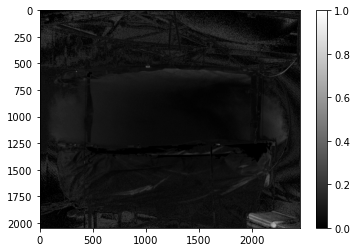

In [7]:
#C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\B\B32_40000\8\24_16_24_11_615496_101933.png
image = np.array(cv2.imread(r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\Data_From_Experiment\B\B23_30000\8\25_16_58_59_495704_101935.png'))
img = image[...,0]
print(image.shape)
img_demosaiced = pa.demosaicing(img)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))
I = Stokes[:, :, 0]
DoLP = pa.cvtStokesToDoLP(Stokes)
AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()

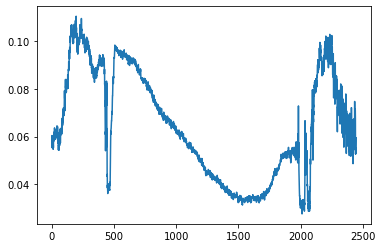

In [8]:
mean = np.mean(DoLP[600:1000,:],0)
plt.plot(mean)
plt.show()


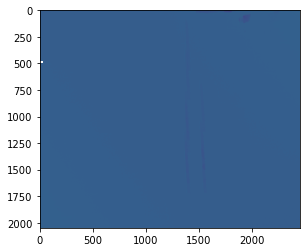

0.9765752482312399


(0.0, 1.0)

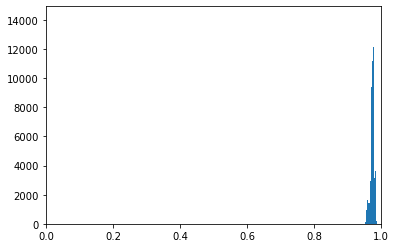

In [9]:
#C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\A\A22_45000\7\25_15_02_18_897203_101935.npy

image = np.load(r'C:\Users\masadatz\Google Drive\CloudCT\svs_vistek\cover_polar_192900073_fixed.npy')
#images = np.squeeze(np.array(init_image[0]))

#im = np.squeeze(np.array(images))
img_demosaiced = pa.demosaicing(image)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
Stokes =  pa.calcLinearStokes(np.moveaxis(np.array([img_0, img_45, img_90, img_135]), 0, -1),
                              np.deg2rad([0,45,90,135]))
I = Stokes[:, :, 0]
DoLP = pa.cvtStokesToDoLP(Stokes)
AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90

#plt.imshow(I, cmap=plt.get_cmap('gray'), vmin=0, vmax=4096)
#cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.imshow(DoLP)
#plt.imshow(DoLP, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#cbar = plt.colorbar(mappable=plt.cm.ScalarMappable(cmap=plt.get_cmap('gray')))
plt.show()
print(np.nanmean(DoLP))

r = cv2.selectROI('to crop image', DoLP, False,False)
# crop:

DCrop = DoLP[int(r[1]):int(r[1]+r[3]),int(r[0]):int(r[0]+r[2])]
cv2.imshow('Image',DCrop)
cv2.waitKey(0)
plt.hist(DCrop.flatten(),100)
plt.xlim([0,1])

(0.0, 256.0)

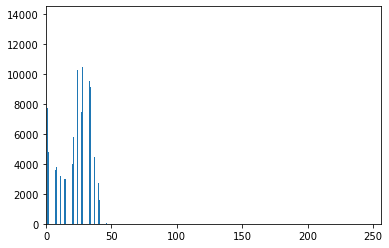

In [4]:
img = cv2.imread(r'B\B51_30000\7\26_10_54_08_012142_192900073.png')
cv2.namedWindow('to crop image', cv2.WINDOW_NORMAL)
im = img[...,0]
#img_demosaiced = pa.demosaicing(im)
#img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
r = cv2.selectROI('to crop image', im, False,False)
# crop:

imCrop = im[int(r[1]):int(r[1]+r[3]),int(r[0]):int(r[0]+r[2])]
cv2.imshow('Image',imCrop)
cv2.waitKey(0)
plt.hist(imCrop.flatten(),2**8)
plt.xlim([0,2**8])
